In [1]:
#!/usr/bin/python
import torch
import os
import pandas as pd
import yaml
import scipy.io as sio
import json

from deeplab3.dataloaders import make_data_loader
from deeplab3.config.defaults import get_cfg_defaults
from deeplab3.test import Tester

import model_utils

In [2]:
model_configs = model_utils.get_all_models("../run/")
len(model_configs)

100

In [3]:
failed = []
model_output = {}

for cfg_filepath in model_configs:
    try:
        cfg = model_utils.match_cfg_versions(cfg_filepath)
        cfg.merge_from_list(['CHECKPOINT.DIRECTORY', os.path.dirname(cfg_filepath),
                             'TEST.MAX_ITER', 1000,
                            'MODEL.PRETRAINED', "",
                            'SYSTEM.GPU_IDS', [0]]) #Since we're using saved models, pretrained weights will be overwritten anyway.

        model_filepath = os.path.join(cfg.CHECKPOINT.DIRECTORY, cfg.CHECKPOINT.MODEL)
        checkpoint = torch.load(model_filepath, map_location=torch.device('cpu'))
        
        model_output[cfg_filepath] = {'dataset': cfg.DATASET.NAME,
                                         'model': cfg.MODEL.NAME,
                                         'image_type': cfg.DATASET.MODE,
                                         'low_light': str(cfg.DATASET.DARKEN.DARKEN),
                                         'epoch': checkpoint['epoch']}
        
        result_file = os.path.join(cfg.CHECKPOINT.DIRECTORY, 'validation_report.txt')
        checkpoint_file = os.path.join(cfg.CHECKPOINT.DIRECTORY, 'checkpoint.pth.tar')
        if cfg.DATASET.DARKEN.DARKEN:
            #os.path.exists(result_file) and (os.path.getmtime(result_file) > os.path.getmtime(checkpoint_file)):
            with open(result_file, 'r') as fp:
                metric_str = fp.read().split('{')[1].split('}')[0].replace("'", '"')
                metrics = json.loads('{' + metric_str + '}')
        else:
            #failed.append(cfg_filepath)
            metrics = model_utils.test_model(cfg, result_file, cfg.CHECKPOINT.DIRECTORY + '/confusion.mat')

        model_output[cfg_filepath].update(metrics)
        
    except Exception as e:
        print(e)
        print(cfg_filepath)
        failed.append(cfg_filepath)
        
    
        

/home/cecilia/pytorch-deeplab-xception/visualization_scripts/model_utils.py:39: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  model_cfg = yaml.load(f)


Non-existent key: RESUME.DIRECTORY
Non-existent key: RESUME.MODEL
Non-existent key: TRAIN.LR_SCHEDULER
Non-existent key: TRAIN.MOMENTUM
Non-existent key: TRAIN.NESTROV
Non-existent key: TRAIN.RESUME
Non-existent key: TRAIN.WEIGHT_DECAY
loading annotations into memory...


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/cecilia/anaconda3/envs/deeplab/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-78aa320548c6>", line 30, in <module>
    metrics = model_utils.test_model(cfg, result_file, cfg.CHECKPOINT.DIRECTORY + '/confusion.mat')
  File "/home/cecilia/pytorch-deeplab-xception/visualization_scripts/model_utils.py", line 75, in test_model
    train_loader, val_loader, test_loader, num_classes = make_data_loader(cfg)
  File "/home/cecilia/pytorch-deeplab-xception/deeplab3/dataloaders/__init__.py", line 26, in make_data_loader
    train_set = coco.COCOSegmentation(cfg, split='train')
  File "/home/cecilia/pytorch-deeplab-xception/deeplab3/dataloaders/datasets/coco.py", line 30, in __init__
    self.coco = COCO(ann_file)
  File "/home/cecilia/anaconda3/envs/deeplab/lib/python3.8/site-packages/pycocotools/coco.py", line 85, in __init__
    da

TypeError: object of type 'NoneType' has no len()

In [18]:
print("\n".join(failed))
model_configs = failed

../run/scenenet/scenenet_depthaware/2020_09_17-09_48_41/parameters.yaml
../run/scenenet/scenenet_depthaware/2020_09_23-18_31_20/parameters.yaml
../run/scenenet/scenenet_rgbd_xception_low_light/2020_09_25-23_09_03/parameters.yaml
../run/scenenet/scenenet_rgbd_xception_low_light/2020_09_25-23_02_16/parameters.yaml
../run/cityscapes/cityscapes_rgb_xception_scenenet/2020_09_25-22_05_32/parameters.yaml
../run/cityscapes/cityscapes_rgb_xception_scenenet/2020_09_25-22_04_04/parameters.yaml
../run/cityscapes/cityscapes_rgb_xception_scenenet/2020_09_25-22_08_16/parameters.yaml
../run/cityscapes/cityscapes_hha_midfusion/2020_09_29-03_21_42/parameters.yaml
../run/cityscapes/cityscapes_rgb_xception_pt/2020_09_29-15_55_19/parameters.yaml
../run/cityscapes/cityscapes_rgbd_resnet_coco_fine/2020_08_05-18_17_41/parameters.yaml
../run/cityscapes/cityscapes_rgb_xception_low_light/2020_09_25-19_36_29/parameters.yaml
../run/cityscapes/cityscapes_rgbd_xception_scenenet/2020_09_25-22_05_38/parameters.yaml
..

In [19]:
model_output
    

{'../run/older/coco_rgb_resnet_scratch/2020_04_10/parameters.txt.yaml': {'dataset': 'coco',
  'model': 'deeplab',
  'image_type': 'RGB',
  'low_light': 'False',
  'epoch': 49,
  'Acc': 0.8435164421288402,
  'Acc_class': 0.4824342349065253,
  'mIoU': 0.3595463132615395,
  'FWIoU': 0.7440447055212059},
 '../run/older/coco_rgb_resnet_scratch/2020-03-29/parameters.txt.yaml': {'dataset': 'coco',
  'model': 'deeplab',
  'image_type': 'RGB',
  'low_light': 'False',
  'epoch': 45,
  'Acc': 0.8390265130093377,
  'Acc_class': 0.4903644343712708,
  'mIoU': 0.36058857881851786,
  'FWIoU': 0.740611087877224},
 '../run/older/cityscapes_hha_midfusion_pretrained/2020_04_06/parameters.txt.yaml': {'dataset': 'cityscapes',
  'model': 'midfusion',
  'image_type': 'RGB_HHA',
  'low_light': 'False',
  'epoch': 77,
  'Acc': 0.5902988041735154,
  'Acc_class': 0.28860781674638136,
  'mIoU': 0.17119790640454474,
  'FWIoU': 0.4601601657506956},
 '../run/older/cityscapes_rgbd_resnet_deeplab/2020-03-30/parameters.

In [21]:
from collections import defaultdict

def plot_comparison(dataset='cityscapes', low_light='False'):
    best = defaultdict(lambda: defaultdict(dict))
    for key, value in model_output.items():
        if value['low_light']==low_light:
            model = "/".join(key.split('/')[3:5])
            model = '{}({})'.format(model, value['epoch'])
            if model in best[value['dataset']][value['image_type']]:
                compare_to = best[value['dataset']][value['image_type']][model]

                if value['mIoU'] > compare_to:
                    compare_to = value['mIoU']
            else:
                best[value['dataset']][value['image_type']][model] = value['mIoU']

    df = pd.DataFrame(best[dataset])
    column_names = df.columns.values.tolist()
    column_names.sort()  # Make sure all the colors are in the same order 
    df = df.sort_values(column_names)

    color=['red', 'green', 'blue']
    color_dict = dict(zip(column_names, color[:len(column_names)]))
    ax = df.plot(kind='barh', figsize=(12,8), color=color_dict)
    for p in ax.patches:
        if p.get_width() > 0 :
            ax.annotate("{:2.2}".format(p.get_width()), (p.get_width() * 1.005, p.get_y() * 1.005))

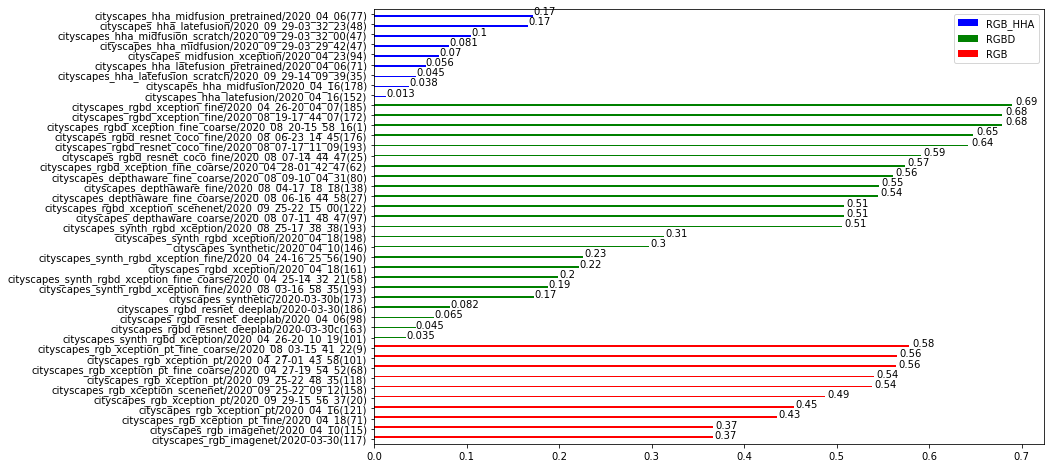

In [22]:
plot_comparison()

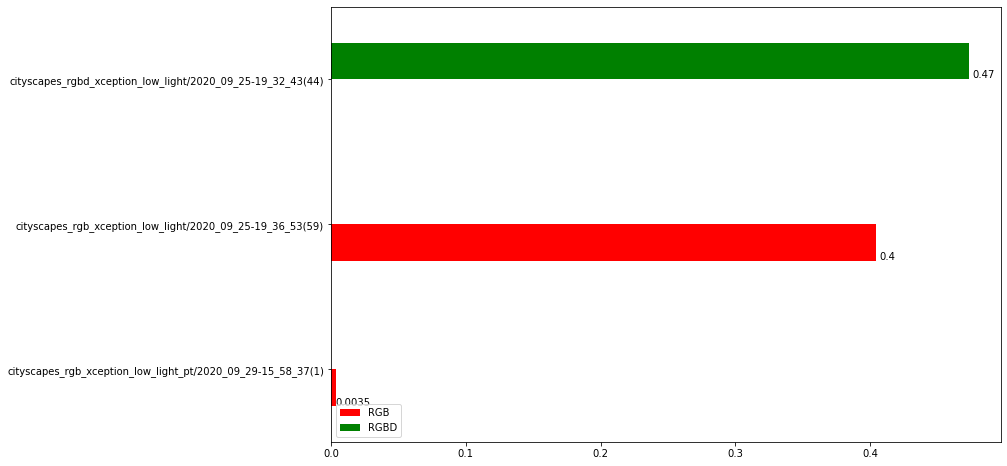

In [23]:
plot_comparison(low_light='True')

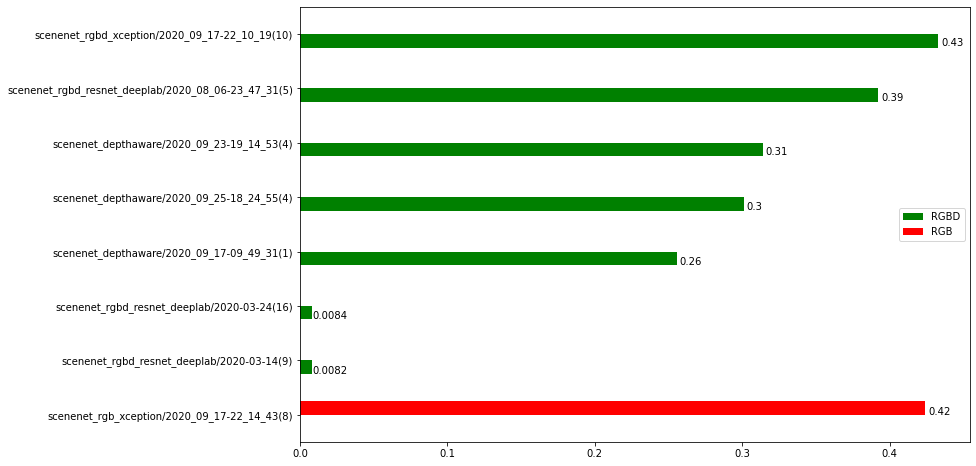

In [24]:
plot_comparison(dataset='scenenet')

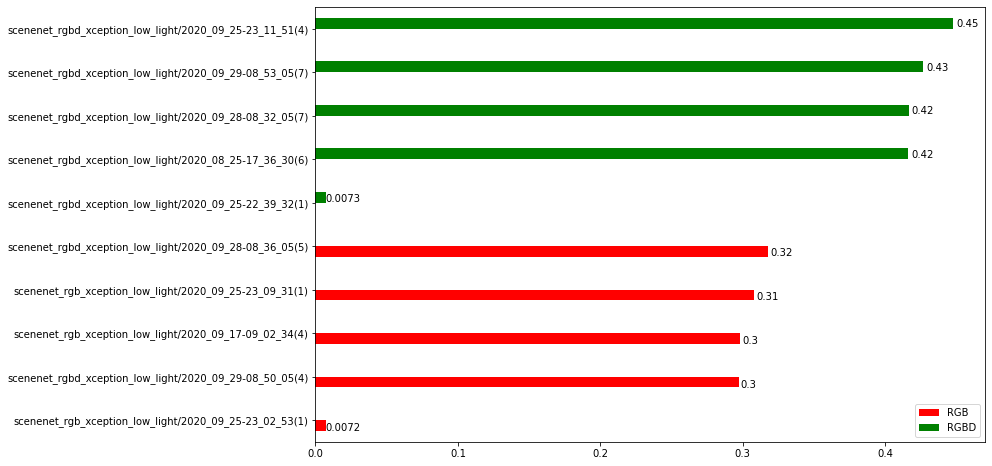

In [25]:
plot_comparison(dataset='scenenet', low_light='True')

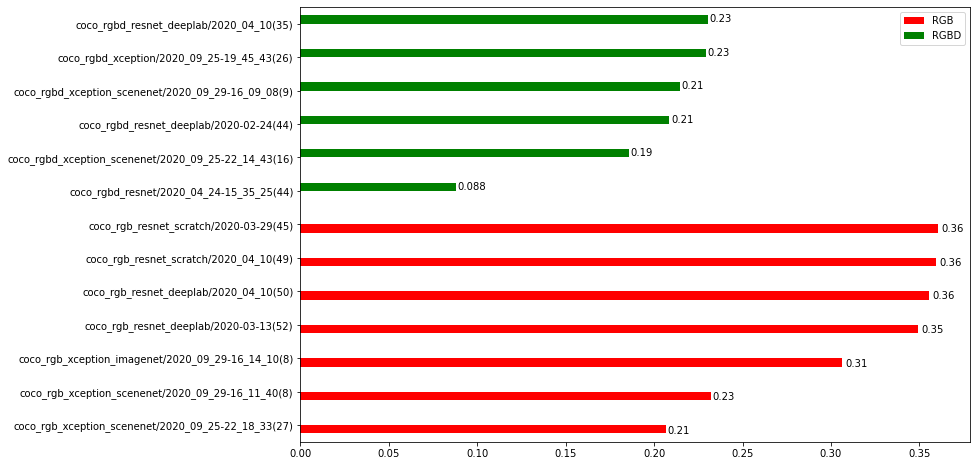

In [26]:
plot_comparison(dataset='coco')

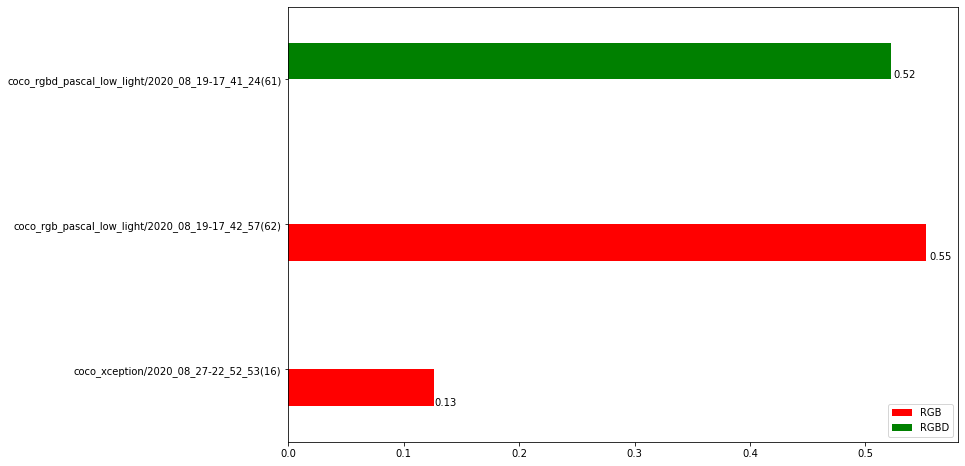

In [27]:
plot_comparison(dataset='coco', low_light='True')